<h1 align="center" style="margin-top:10px">Regression Modeling</h1>

In this tutorial we will learn about linear regression and build it using python.

### Home reading
This is not a required program, but it may be helpful to you.

* [Regression for causal inference](https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html)
* [More information about linear regression and how it relates to neural networks.](https://d2l.ai/chapter_linear-regression/linear-regression.html)
*  [A course with tips for your Kaggle competition](https://youtube.com/playlist?list=PLaRUeIuewv8CMFox0oEjlyePUhUmo-x0h)

<h1 align="center" style="margin-top:10px">Linear regression</h1>

Linear Regression is a simple and powerful model for predicting a numeric response from a set of one or more independent variables. We will focus mostly on how the method is used in machine learning, so we won't cover common use cases like causal inference or experimental design. If you want to know more about it see first link in home reading paragraph. And although it may seem like linear regression is overlooked in modern machine learning's ever-increasing world of complex neural network architectures, the algorithm is still widely used across a large number of domains because it is effective, easy to interpret, and easy to extend. The key ideas in linear regression are recycled everywhere, so understanding the algorithm is a must-have for a strong foundation in machine learning.

***Typical task for linear regression.***

It might sound like this: suppose we have information about apartments: area, number of rooms, bathroom size, distance from the center, average age of neighboring houses and its price. We need to build a model that returns the price of the apartment according to its properties.

### About the formula

Linear regression is a supervised algorithm that learns to model a dependent variable, $y$, as a function of some independent variables (aka "features"), 
$x_{i}$ , by finding a line (or surface) that best "fits" the data. 

For example: predicting the price of a house using the number of rooms in that house ($y$: price, $x_{1}$ : number of rooms)

In general, the equation for linear regression is

\begin{align}
        y = \beta_0 + \beta_1*x_1+\beta_2*x_2+...+\beta_n*x_n+\epsilon 
    \end{align}

Where:

*   $y$: the dependent variable; the thing we are trying to predict.
*   $\beta_0$: the coefficients (aka "weights") of our regression model. These are the foundations of our model. They are what our model "learns" during optimization.
*   $x_i$: the independent variables: the features our model uses to model y.
*   ϵ: the irreducible error in our model. A term that collects together all the unmodeled parts of our data. And its [ok](https://en.wikipedia.org/wiki/Noise:_A_Flaw_in_Human_Judgment)



Fitting a linear regression model is all about finding the set of cofficients that best model y as a function of our features. We may never know the true parameters for our model, but we can estimate them (more on this later). Once we've estimated these coefficients, $\hat\beta_{i}$, we predict future values $\hat{y}$ as:

\begin{align}
        \hat{y} = \hat\beta_0 + \hat\beta_1*x_1+\hat\beta_2*x_2+...+\hat\beta_n*x_n
    \end{align}

So predicting future values (often called inference), is as simple as plugging the values of our features $x_{i}$ into our equation!

### How it works

To make linear regression easier to digest, let's go through a quick, high-level introduction of how it works. We'll scroll through the core concepts of the algorithm at a high-level, and then delve into the details thereafter:

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic1.png?raw=true:, width=800" alt="My Image" width=800>

Let's fit a model to predict housing price ($) in San Diego, USA using the size of the house (in square-footage):

\begin{align}
        house \,  price = \hat\beta_0 + \hat\beta_1*sqft
    \end{align}

We'll start with a very simple model, predicting the price of each house to be just the average house price in our dataset, ~$290,000, ignoring the different sizes of each house: 

\begin{align}
        house \,  price = 290000 + 0*sqft
    \end{align}

Of course we know this model is bad - the model doesn't fit the data well at all. But how can do quantify exactly how bad? 

To evaluate our model's performance quantitatively, we plot the error of each observation directly. These errors, or residuals, measure the distance between each observation and the predicted value for that observation. We'll make use of these residuals later when we talk about evaluating regression models, but we can clearly see that our model has a lot of error.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic2.png?raw=true:, width=800" alt="My Image" width=800>

The goal of linear regression is reducing this error such that we find a line/surface that 'best' fits our data. For our simple regression problem, that involves estimating the y-intercept and slope of our model, $\hat\beta_{0}$ and $\hat\beta_{1}$

For our specific problem, the best fit line is shown. There's still error, sure, but the general pattern is captured well. As a result, we can be reasonably confident that if we plug in new values of square-footage, our predicted values of price would be reasonably accurate.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic3.png?raw=true:, width=800" alt="My Image" width=800>

Once we've fit our model, predicting future values is super easy! We just plug in any $x_{i}$ values into our equation! 

\begin{align}
        house \,  price = −27153.8 + 756.9*sqft
    \end{align}

### Model Evaluation

To train an accurate linear regression model, we need a way to quantify how good (or bad) our model performs. In machine learning, we call such performance-measuring functions loss functions. Several popular loss functions exist for regression problems. One of the most popular: mean-squared error (MSE). 

**MEAN-SQUARED ERROR**
<br>
MSE quantifies how close a predicted value is to the true value, so we'll use it to quantify how close a regression line is to a set of points. MSE works by squaring the distance between each data point and the regression line (the red residuals in the graphs above), summing the squared values, and then dividing by the number of data points:

\begin{align}
        MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2
    \end{align}

The squaring of errors prevents negative and positive terms from canceling out in the sum, and gives more weight to points further from the regression line, punishing outliers. If we use such a loss function, we predict the conditional mathematical expectation. You can think of it as an arithmetic mean. If we replace the squaring by taking absolute values, we will predict the median.

\begin{align}
        MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat y_i|
    \end{align}

In other words, if we take 100 houses with the same area, then to estimate the arithmetic mean of their prices, we must use MSE, but to know the median, then MAE.

But sometimes we may be interested in a specific quantile. For example, we want to know the relationship between total family income and the share of income spent on food. We know that this proportion should decrease as income increases. Applying quantile regression to this data, we can determine what food expenditures might cover 90% of families (out of 100 families with the selected income)

Quantile regression has recently appeared in ***scikit-learn*** (the main machine learning library in python). It is also in the ***statsmodels*** library.

In addition to business logic, the reason for using quantile regression may be
* Search for outliers
* Building confidence intervals

You can find loss function for such type of regression [here](https://jblevins.org/notes/qreg).

**R-Squared**

Regression models may also be evaluated with the so-called goodness of fit measures, which summarize how well a model fits a set of data. The most popular goodness of fit measure for linear regression is r-squared, a metric that represents the percentage of the variance in y explained by our features x.

The highest possible value for r-squared is 1, representing a model that captures 100% of the variance. A negative r-squared means that our model is doing worse (capturing less variance) than a flat line through mean of our data would. 
R2 is not used as a loss function, it is a metric to compare/evaluate models.

Many methods exist for evaluating regression models, each with different concerns around interpretability, theory, and usability. The evaluation metric should reflect whatever it is you actually care about when making predictions. For example, when we use MSE, we are implicitly saying that we think the cost of our prediction error should reflect the quadratic (squared) distance between what we predicted and what is correct. This may work well if we want to punish outliers or if our data is minimized by the mean, but this comes at the cost of interpretability: we output our error in squared units (though this may be fixed with RMSE). If instead we wanted our error to reflect the linear distance between what we predicted and what is correct, or we wanted our data minimized by the median, we could try something like Mean Abosulte Error (MAE). Whatever the case, you should be thinking of your evaluation metric as part of your modeling process, and select the best metric based on the specific concerns of your use-case.

### Fit model

As a rule, mathematical libraries use iterative methods of parameter selection. But there are also analytical solutions. Let us consider the first approach.

***Gradient descent*** is an iterative optimization algorithm that estimates some set of coefficients to yield the minimum of a convex function. Put simply: it will find suitable coefficients for our regression model that minimize prediction error (remember, lower MSE equals better model). 

Gradient descent works as follows. We assume that we have some convex function representing the error of our machine learning algorithm (in our case, MSE). Gradient descent will iteratively update our model's coefficients in the direction of our error functions minimum

In our case error (loss) function takes the form

\begin{align}
        MSE(\hat\beta_0, \hat\beta_1) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (\hat\beta_0 + \hat\beta_1*x_i))^2
    \end{align}

Our goal is to find the coefficients, $\hat\beta_0$, $\hat\beta_1$ to minimize the error function. To do this, we'll use the gradient, which represents the direction that the function is increasing, and the rate at which it is increasing. Since we want to find the minimum of this function, we can go in the opposite direction of where it's increasing. This is exactly what Gradient Descent does, it works by taking steps in the direction opposite of where our error function is increasing, proportional to the rate of change. To find the coefficients that minimize the function, we first calculate the derivatives of our error function is increasing. To find the coefficients that minimize first, calculate the derivatives of our loss function, MSE:

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic4.png?raw=true:, width=800" alt="My Image" width=800>

Now that we have the gradients for our error function (with respect to each coefficient to be updated), we perform iterative updates:

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic5.png?raw=true:, width=800" alt="My Image" width=800>

Where $α$ - is learning rate (Speed of learning). The lower the learning rate, the longer it takes for our model to learn, but it often gives a more accurate approximation to the minimum point.

<img src="https://github.com/mashinistt/pics_for_collab/blob/main/pic6.png?raw=true:, width=800" alt="My Image" width=800>

We repeat it until converge.

But we can calculate gradient by different ways.

**Batch gradient descent (BGD)** is used to find the error for each point in the training set and update the model after evaluating all training examples. This procedure is known as the training epoch. In simple words, it is a greedy approach where we have to sum over all examples for each update.

Advantages of Batch gradient descent:

1.   It produces less noise in comparison to other gradient descent.
2.   It produces stable gradient descent convergence.
3.   It is Computationally efficient as all resources are used for all training samples.

**Stochastic gradient descent (SGD)** is a type of gradient descent that runs one training example per iteration. Or in other words, it processes a training epoch for each example within a dataset and updates each training example's parameters one at a time. As it requires only one training example at a time, hence it is easier to store in allocated memory. However, it shows some computational efficiency losses in comparison to batch gradient systems as it shows frequent updates that require more detail and speed. Further, due to frequent updates, it is also treated as a noisy gradient. However, sometimes it can be helpful in finding the global minimum and also escaping the local minimum.

Advantages of Stochastic gradient descent:

In Stochastic gradient descent (SGD), learning happens on every example, and it consists of a few advantages over other gradient descent.

1.   It is easier to allocate in desired memory.
2.   It is relatively fast to compute than batch gradient descent.
3.   It is more efficient for large datasets.

**Mini Batch gradient descent** is the combination of both batch gradient descent and stochastic gradient descent. It divides the training datasets into small batch sizes then performs the updates on those batches separately. Splitting training datasets into smaller batches make a balance to maintain the computational efficiency of batch gradient descent and speed of stochastic gradient descent. Hence, we can achieve a special type of gradient descent with higher computational efficiency and less noisy gradient descent.

Advantages of Mini Batch gradient descent:

1.   It is easier to fit in allocated memory.
2.   It is computationally efficient.
3.   It produces stable gradient descent convergence.

In research publications and statistical software, coefficients of regression models are often presented with associated p-values. These p-values come from traditional null hypothesis statistical tests: t-tests are used to measure whether a given coefficient is significantly different than zero (the null hypothesis that a particular coefficient equals zero), while F tests are used to measure whether any of the terms in a regression model are significantly different from zero. Different opinions exist on the utility of such tests. In practice, it often happens that the coefficient is statistically significant, but too small to have much effect on the result. On the other hand, the statistical test may not have enough power to capture a meaningful deviation of the coefficient from zero. In machine learning we often deal with a very large number of features. So if you remember about first- and second-order errors, you understand that selecting features only by p-value is not a good idea.

* [Gradient descent step by step](https://youtu.be/sDv4f4s2SB8)
* [Advanced gradient methods](https://ruder.io/optimizing-gradient-descent/)


### Interpreting Regression Models

Suppose we have a model with a binary feature.

\begin{align}
        house \,  price = \hat\beta_0 + \hat\beta_1*has\_pool
    \end{align}

The intercept is the average predicted price for houses that do not have swimming pools. To find the average predicted price for houses with pools, we simply plug in pool=1, so $\beta_1$ is how much the average presence of feature $x_1$ changes our target ($y$).

Let's go back to our first model.

\begin{align}
        house \,  price = \hat\beta_0 + \hat\beta_1*sqft
    \end{align}

Where sqft (home square) is continuous feature. The coefficient b1 represents the average difference in housing price for one-unit difference in the square-footage of the house. In other words, we expect each additional square-foot, on average, to raise the price of a house by b1. 

But often we logarithm the target variable, for example, to combat heteroscedasticity. Then the following models will be interpreted a little differently

\begin{align}
        log(house \,  price) = \hat\beta_0 + \hat\beta_1*log(sqft)
    \end{align}

How much percents would the price of the house change if the square footage of the house changed by 1 percent?

\begin{align}
        log(house \,  price) = \hat\beta_0 + \hat\beta_1*sqft
    \end{align}

How much percents would the price of the house change if the square footage of the house changed by 1 square meter?

If we build a model with multiple features, the logic remains the same: coefficient $\beta_i$ shows the average change in the target if all other coefficients are the same.

But we can go further and model features interactions.

\begin{align}
        house \,  price = \hat\beta_0 + \hat\beta_1*has\_pool + \hat\beta_2 *sqft + \hat\beta_3 * (sqft:has\_pool)
    \end{align}

If we believe that the slope for sqft should differ between houses that do have pools and houses that do not, we can add an interaction term to our model. The coefficient of the interaction term (sqft:pool), −$347, represents the difference in the slope for sqft, comparing houses that do and do not have pools. So if b3 is negative, it means that the additional area for apartments with pools is not such significant as for apartments without. And vice versa.

### Assumptions

When teaching regression models, it's common to mention the various assumptions underpinning linear regression. For completion, we'll list some of those assumptions here. However, in the context of machine learning we care most about if the predictions made from our model generalize well to unseen data. We'll use our model if it generalizes well even if it violates statistical assumptions. 



 
But knowing a few of them can help make your model better

*   Linearity: the parameters we are estimating using the OLS method must be themselves linear.
*   Non-Collinearity: the regressors being calculated aren’t perfectly correlated with each other.
*   Exogeneity: the regressors aren’t correlated with the error term.
*   Homoscedasticity: no matter what the values of our regressors might be, the error of the variance is constant.
*   Normality of Errors: The errors from our model are normally distributed.


What should we do if the assumptions for our regression model aren't met? Don't fret, it's not the end of the world! First, double-check that the assumptions even matter in the first place: if the predictions made from our model generalize well to unseen data, and our task is to create a model that generalizes well, then we're probably fine. If not, figure out which assumption is being violated, and how to address it! 

# Practice

In [ ]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # this is to clear the warnings from this page, typically you would leave them on

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

## Data

The <TT>Employees.csv</TT> file records data about the employees of a company. The dataset is from [Business Analytics for Managers](http://www.springer.com/us/book/9781461404057) by Wolfgang Jank.  In this problem, the managers are concerned with the issue of equal pay in the company. If we compare male and female employees with the same level of experience, are they paid the same on average?

In recent years, workforce, [HR](https://www-01.ibm.com/software/analytics/solutions/operational-analytics/hr-analytics/), and [people analytics](http://knowledge.wharton.upenn.edu/article/open-sourcing-googles-hr-secrets/) have emerged as terms for the practice of data-driven human capital management. 

In [ ]:
data=pd.read_csv('Employees.csv')
data.head()

,Gender,Experience,Salary
0,Female,15,78200
1,Female,12,66400
2,Female,15,61200
3,Female,3,61000
4,Female,4,60000


## Training and Test Sets

We use the Scikit-Learn train_test_split method to split the data into training and test sets.

Below, we specify that the training set will contain 70% of the data. The random state parameter is an arbitrary number. By setting a specific value for the random state we ensure that we get the same training and test sets if we run the analysis again, even though the split is random. A test set is needed to evaluate the model. We'll talk more about this in future lectures, but for now just trust that this is the right approach.

In [ ]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, random_state=10)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()   # the copy here is for technical reasons

train.head()

,Gender,Experience,Salary
24,Female,11,70800
43,Female,9,59600
144,Male,7,53400
21,Female,18,68000
129,Female,15,102400


## Exploratory Data Analysis

Exploratory data analysis (EDA) is the process of discovering features and patterns in the data that should inform the modelling process and, in some cases, prevent errors. Here we conduct a short EDA of the dataset. Remember that we should use only the training set for this purpose. 

The next several cells display a range of summary measures and exploratory plots for the data. We learn for example that: 

* On average, male employees have higher salaries than female employees. The pay gap seems to be larger at the upper quantiles of the salary distribution for each group.  The variance in salaries is substantially higher for males.

 
* The distribution of salary is clearly right skewed for both males and females.


* Not surprisingly, experience is strongly positively related with salary. When considering all the employees, three of them appear to be outliers as they have much higher salaries than the rest. These are probably senior executives in the company (further investigation would reveal that they are all males). 


* There seems to be an interaction between gender and experience. The pay gap increases with the level of experience. Allowing for this interaction, the employees with highest salaries do not seem to be outliers anymore.



In [ ]:
train.groupby('Gender')['Salary'].describe().round(2)      # round the results to two decimal places

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,97.0,75034.85,13573.05,54000.0,65480.0,72800.0,82800.0,123600.0
Male,48.0,90211.25,30172.77,53400.0,69130.0,85000.0,97250.0,194000.0


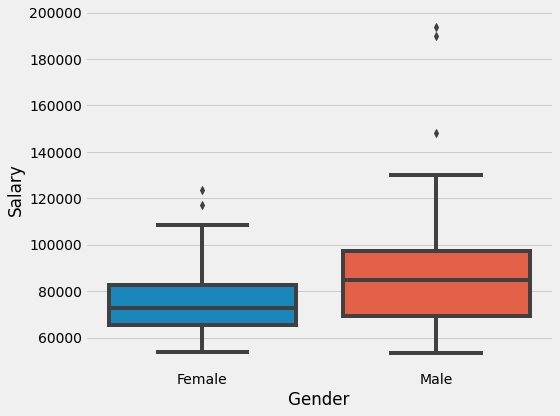

In [ ]:
sns.boxplot(x='Gender', y='Salary', data=train)
plt.tight_layout()
plt.rcParams['figure.figsize'] = (6, 6)
plt.show()

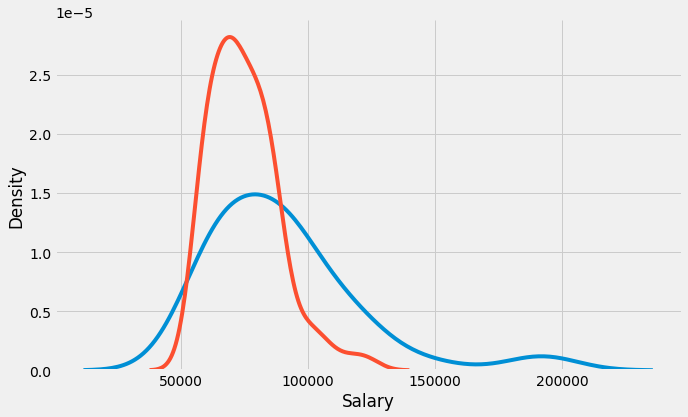

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.distplot(train.loc[train['Gender']=='Male','Salary'], hist=False, label='Male')
sns.distplot(train.loc[train['Gender']=='Female','Salary'], hist=False, label='Female')
sns.despine()
plt.show()

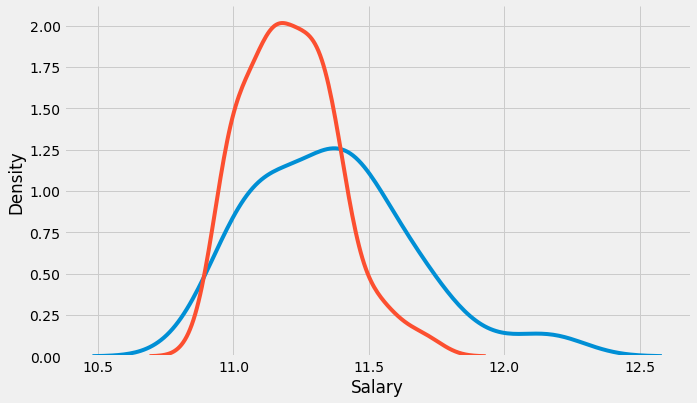

In [ ]:
sns.distplot(np.log(train.loc[train['Gender']=='Male','Salary']), hist=False, label='Male')
sns.distplot(np.log(train.loc[train['Gender']=='Female','Salary']), hist=False, label='Female')
sns.despine()
plt.show()

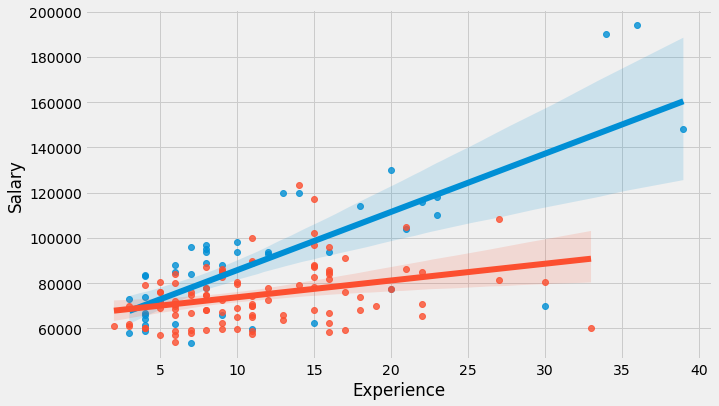

In [ ]:
sns.regplot(train.loc[train['Gender']=='Male','Experience'],train.loc[train['Gender']=='Male','Salary'],label='Male')
sns.regplot(train.loc[train['Gender']=='Female','Experience'],train.loc[train['Gender']=='Female','Salary'],label='Male')
plt.show()

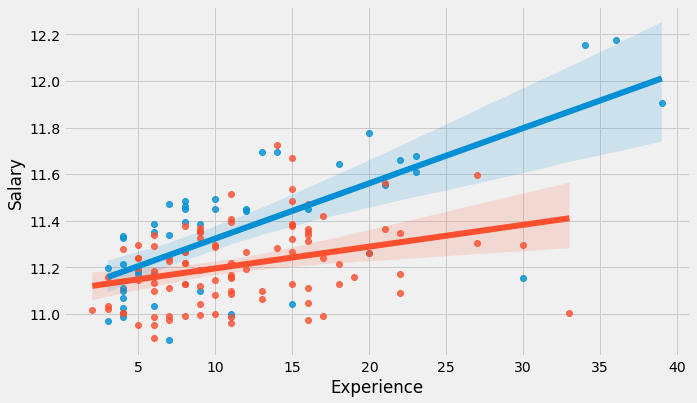

In [ ]:
sns.regplot(train.loc[train['Gender']=='Male','Experience'],np.log(train.loc[train['Gender']=='Male','Salary']),label='Male')
sns.regplot(train.loc[train['Gender']=='Female','Experience'],np.log(train.loc[train['Gender']=='Female','Salary']),label='Male')
plt.show()

## Data Preparation

In most cases, we need to perform additional processing to get the data ready for training machine learning models and computing predictions. It is good practice to write a function for this step.

Below we create a dummy valiable in order to incorporate the gender predictor into the regression.

In [ ]:
def prepare_data(df):
    df['Female']=(df['Gender'] =='Female').astype(int) # create dummy variable for gender (last part converts True/F to 1/0)
    return df


train = prepare_data(train)
test = prepare_data(test)

train.head()

,Gender,Experience,Salary,Female
24,Female,11,70800,1
43,Female,9,59600,1
144,Male,7,53400,0
21,Female,18,68000,1
129,Female,15,102400,1


Creating other types of variables is easy. We know that salaries tend to increase in percentage terms every year, so that it is plausible that the relationship between salary and experience may be better described as a log-linear relationship. The log transformation may also help to reduce the positive skewness that we found in the EDA. 

## Train model

There are several ways to estimate a linear regresssion in Python. In this tutorial, we use the statmodels package, as it generates [more informative](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html) outputs and results.

In [ ]:
import statsmodels.formula.api as smf

formula='Salary ~ Female + Experience'
ols = smf.ols(formula=formula, data=train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     52.64
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           7.86e-18
Time:                        19:54:03   Log-Likelihood:                -1612.9
No. Observations:                 145   AIC:                             3232.
Df Residuals:                     142   BIC:                             3241.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.04e+04   3275.348     21.494      0.0

In [ ]:
np.round(ols.mse_model)

14449.0

The output is difficult to read because of the scale of the salary variable.  We can improve it by expressing the salary in thousands.  Using the formula approach makes it easier to transform variables for purposes of estimating the regression. 

In [ ]:
formula='np.divide(Salary, 1000) ~ Female + Experience'
ols = smf.ols(formula=formula, data=train).fit()
print(ols.summary())

                               OLS Regression Results                              
Dep. Variable:     np.divide(Salary, 1000)   R-squared:                       0.426
Model:                                 OLS   Adj. R-squared:                  0.418
Method:                      Least Squares   F-statistic:                     52.64
Date:                     Mon, 14 Nov 2022   Prob (F-statistic):           7.86e-18
Time:                             21:08:18   Log-Likelihood:                -611.30
No. Observations:                      145   AIC:                             1229.
Df Residuals:                          142   BIC:                             1238.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

If were compare a male and female employee with the same level of experience, we would expect the female employee to earn 15.1K less according to this estimate (note: coefficients depend on the random split into training and test data, so you might get different values). The coefficient for the Female variable is statistically significant, so that we can reliably conclude that the female employees have lower salaries on average controlling for experience. 

Is this model appropriate for the data? We should use residual diagnostics to check. The diagnostic plot below reveals a nonlinear pattern in the residuals, which means that the linear specification is not correct for this data. We should try to improve the model by considering a log transformation (suggested by domain knowledge and EDA) and an interaction term (suggested by EDA). 

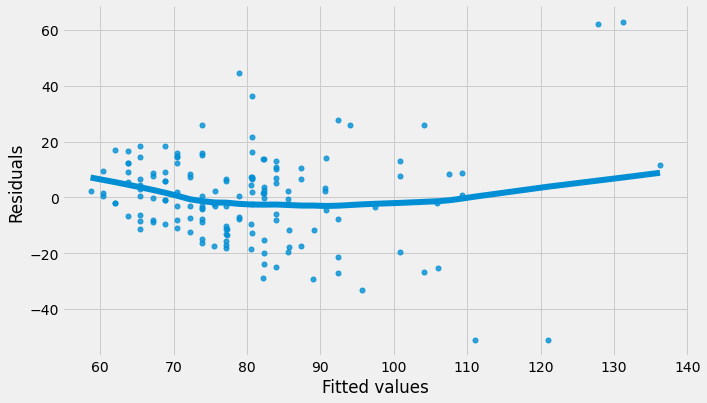

In [ ]:
fig, ax= plt.subplots()

# Note that we are getting the fitted values and the residuals from the regression results here
# The lowess option fits a nonparametric regression to the scatter plot, allowing us to visualise possible nonlinear patterns

sns.regplot(ols.fittedvalues, ols.resid, scatter_kws={'s' : 25}, lowess=True, ax=ax) 
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
sns.despine()
plt.show()

Interpret the two models below (especially the coefficients). Note that the second model includes a an interaction term (for gender and experience).

In [ ]:
formula='np.log(Salary) ~ Female + Experience'
ols = smf.ols(formula=formula, data=train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Salary)   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     42.90
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.67e-15
Time:                        21:12:46   Log-Likelihood:                 41.754
No. Observations:                 145   AIC:                            -77.51
Df Residuals:                     142   BIC:                            -68.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1676      0.036    308.103      0.0

In [ ]:
formula='np.log(Salary) ~ Female + Experience + Experience:Female'
ols = smf.ols(formula=formula, data=train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Salary)   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     35.06
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.42e-17
Time:                        21:13:17   Log-Likelihood:                 47.894
No. Observations:                 145   AIC:                            -87.79
Df Residuals:                     141   BIC:                            -75.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.0863      0.04

We can check that this last specification improves the residuals.

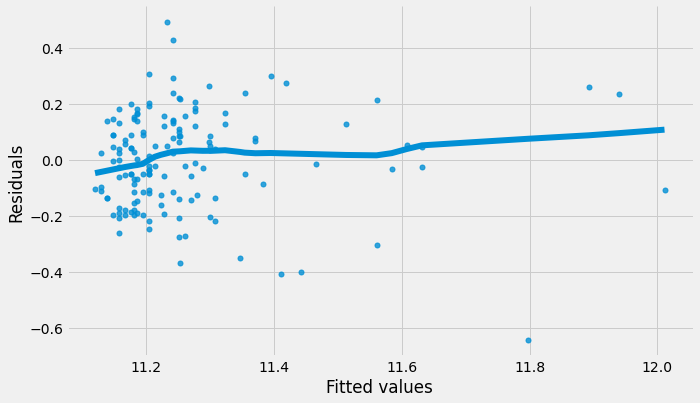

In [ ]:
fig, ax= plt.subplots()
sns.regplot(ols.fittedvalues, ols.resid, scatter_kws={'s' : 25}, lowess=True, ax=ax)
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
sns.despine()
plt.show()

## Model Evaluation

We now compare different specifications on the test data. Note that for the models with a log transformed response, we use an appropriate retransformation and an adjustment when computing the predictions for salary. 

We should be careful with our analysis since there are not many test cases. Here are some tentative conclusions. 

* The models with an interaction term predict better than the ones without.


* When comparing the two models with the interaction term, the log model has slightly better predictive ability.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rmse=[]       # initialize the rmse list
r2=[]         # initialize the r-squared list

# Model 1
formula='Salary ~ Female + Experience'
ols = smf.ols(formula=formula, data=train).fit()       # run the ols model
predictions = ols.predict(test)       # use the model to make predictions on the test data 
rmse.append(np.sqrt(mean_squared_error(test['Salary'], predictions)))  # evaluate the rmse and add it to the rmse list
r2.append(r2_score(test['Salary'], predictions))                   # evaluate the r-squared and add it to the r-squared list

# Model 2
formula='Salary ~ Female + Experience + Experience:Female'
ols = smf.ols(formula=formula, data=train).fit()
predictions = ols.predict(test)
rmse.append(np.sqrt(mean_squared_error(test['Salary'], predictions)))
r2.append(r2_score(test['Salary'], predictions))

# Model 3
formula='np.log(Salary) ~ Female + Experience'
ols3 = smf.ols(formula=formula, data=train).fit()
predictions = np.exp(ols3.predict(test))
rmse.append(np.sqrt(mean_squared_error(test['Salary'], predictions)))
r2.append(r2_score(test['Salary'], predictions))

# Model 4
formula='np.log(Salary) ~ Female + Experience + Experience:Female'
ols= smf.ols(formula=formula, data=train).fit()
predictions = np.exp(ols.predict(test))
rmse.append(np.sqrt(mean_squared_error(test['Salary'], predictions)))
r2.append(r2_score(test['Salary'], predictions))

# Initialise the table that will display the results
columns=['RMSE', 'R-Squared']
rows=['Base Model',  'Interaction', 'Log Transform', 'Log Transform + Interaction']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# Fill out the table
for i in range(4):
    results.iloc[i, 0] = rmse[i]
    results.iloc[i, 1] = r2[i]
    
results.round(2)

,RMSE,R-Squared
Base Model,17795.96,0.46
Interaction,15052.05,0.61
Log Transform,17302.54,0.49
Log Transform + Interaction,14840.45,0.63


## Log results

In [ ]:
! pip install neptune-client --quiet

     |████████████████████████████████| 433 kB 9.2 MB/s 
     |████████████████████████████████| 132 kB 10.4 MB/s 
     |████████████████████████████████| 182 kB 38.6 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 829 kB 38.3 MB/s 
     |████████████████████████████████| 1.9 MB 47.4 MB/s 
     |████████████████████████████████| 9.9 MB 51.3 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 140 kB 54.9 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 130 kB 56.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 127 kB 68.5 MB/s 
     |████████████████████████████████| 66 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
     |████████████████████████████████| 4.1 MB 36.4 MB/s 


In [ ]:
import neptune.new as neptune

In [ ]:
import yaml
with open('cred.yaml') as f:
    config = yaml.safe_load(f)

In [ ]:
run = neptune.init(
    project=config['project'],
    api_token=config['api_token'],
)

https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-1


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:
run['name'] = 'Baseline'
run['description'] = 'Our first OLS model'

params = {
    "formula": 'Salary ~ Female + Experience'
}
run['parameters']=params

In [ ]:
ols = smf.ols(formula=formula, data=train).fit() 
predictions = ols.predict(test) 

In [ ]:
rmse_ = np.sqrt(mean_squared_error(test['Salary'], predictions))
r2_ = r2_score(test['Salary'], predictions)

In [ ]:
run["evaluation/rmse"] = rmse_
run["evaluation/r2"] = r2_

In [ ]:
from neptune.new.types import File
run["model/pickled_model"].upload(File.as_pickle(ols))

In [ ]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
All 3 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-1


In [ ]:
run = neptune.init(
    project=config['project'],
    api_token=config['api_token'],
)

https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-4
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [ ]:
run['name'] = 'Advanced_fixed'
run['description'] = 'Ols model with interaction'
formula = 'np.log(Salary) ~ Female + Experience + Experience:Female'
params = {
    "formula": formula
}
run['parameters']=params
ols = smf.ols(formula=formula, data=train).fit() 
predictions = np.exp(ols.predict(test))
rmse_ =np.sqrt(mean_squared_error(test['Salary'], predictions))
r2_ = r2_score(test['Salary'], predictions)

run["evaluation/rmse"] = rmse_
run["evaluation/r2"] = r2_

from neptune.new.types import File
run["model/pickled_model"].upload(File.as_pickle(ols))
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 14 operations to synchronize with Neptune. Do not kill this process.
All 14 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/mashinistt/hse-lesson1/e/HSEL-4
